# 1. Classical package: H. Wickham’s ggplot2 Vignette

                                                                                   REF :"http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html#org93999d8"

Load data

In [1]:
housing <- read.csv("C:/Users/vivek/Box Sync/Spring 2017/587 DIC/LAB3/data/Rgraphics/dataSets/landdata-states.csv")
head(housing[1:5])

State,region,Date,Home.Value,Structure.Cost
AK,West,2010.25,224952,160599
AK,West,2010.50,225511,160252
AK,West,2009.75,225820,163791
AK,West,2010.00,224994,161787
AK,West,2008.00,234590,155400
AK,West,2008.25,233714,157458


Base graphics histogram example: 

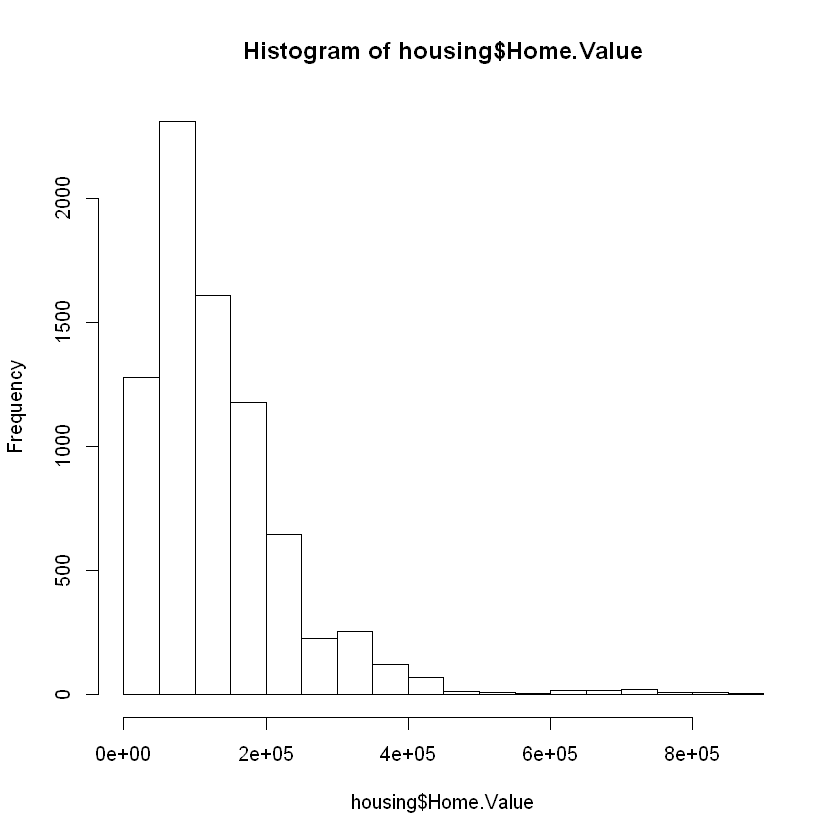

In [2]:
hist(housing$Home.Value)

ggplot2 histogram

Warning message:
"package 'ggplot2' was built under R version 3.3.3"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


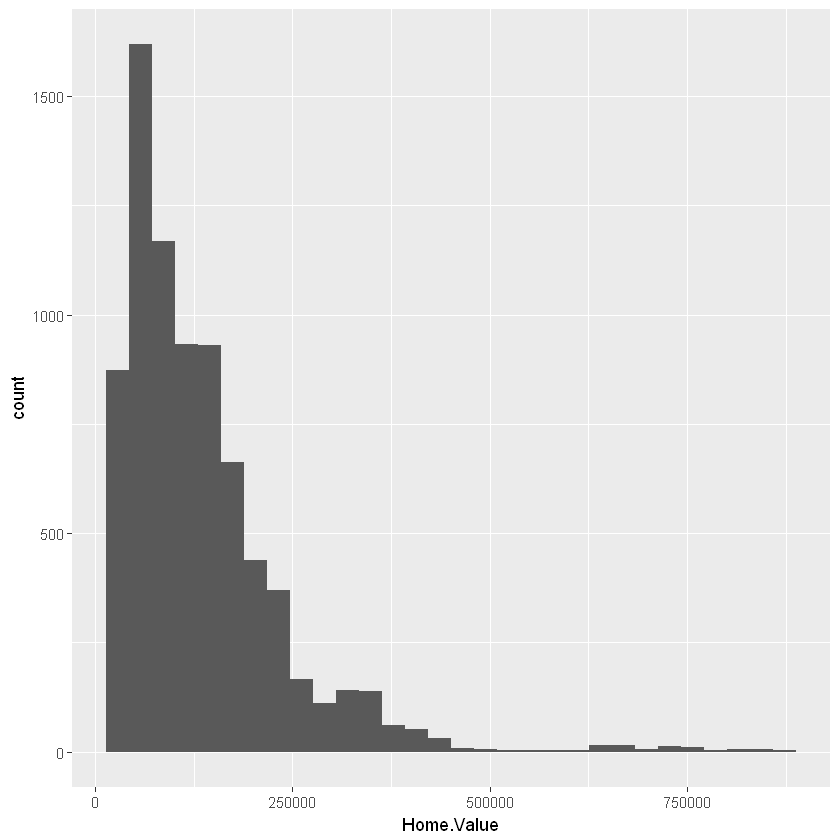

In [3]:
library(ggplot2)
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

ggplot2 Base graphics VS ggplot for more complex graphs

Base colored scatter plot example: 

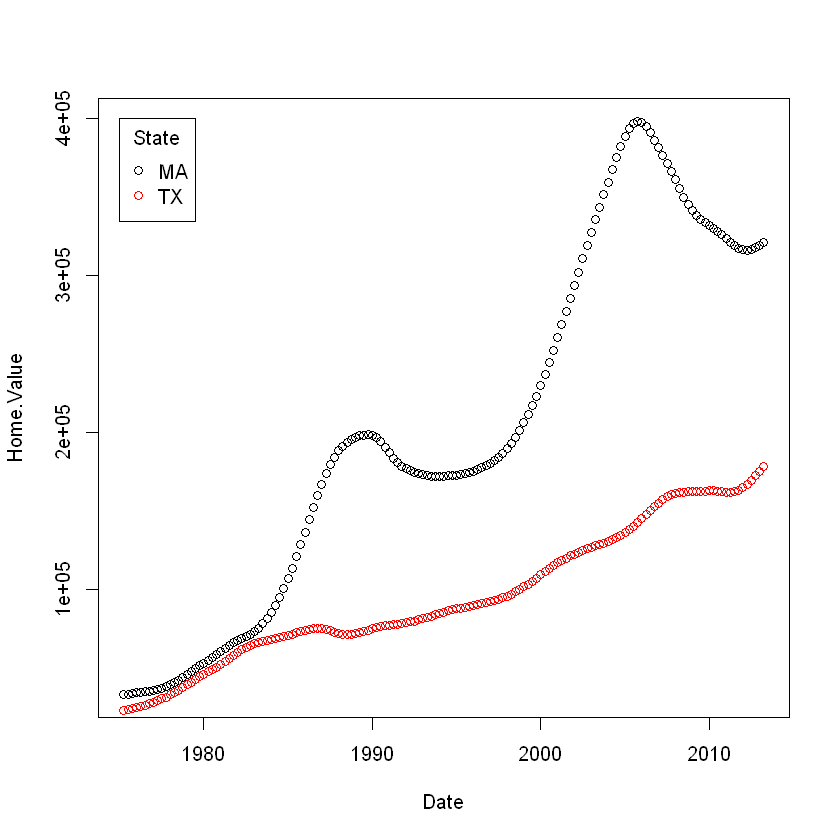

In [4]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

ggplot2 colored scatter plot example:

AES is aesthetics. Each type of geom accepts only a subset of all aesthetics–refer to the geom help pages to see what mappings each geom accepts. Aesthetic mappings are set with the aes() function. 

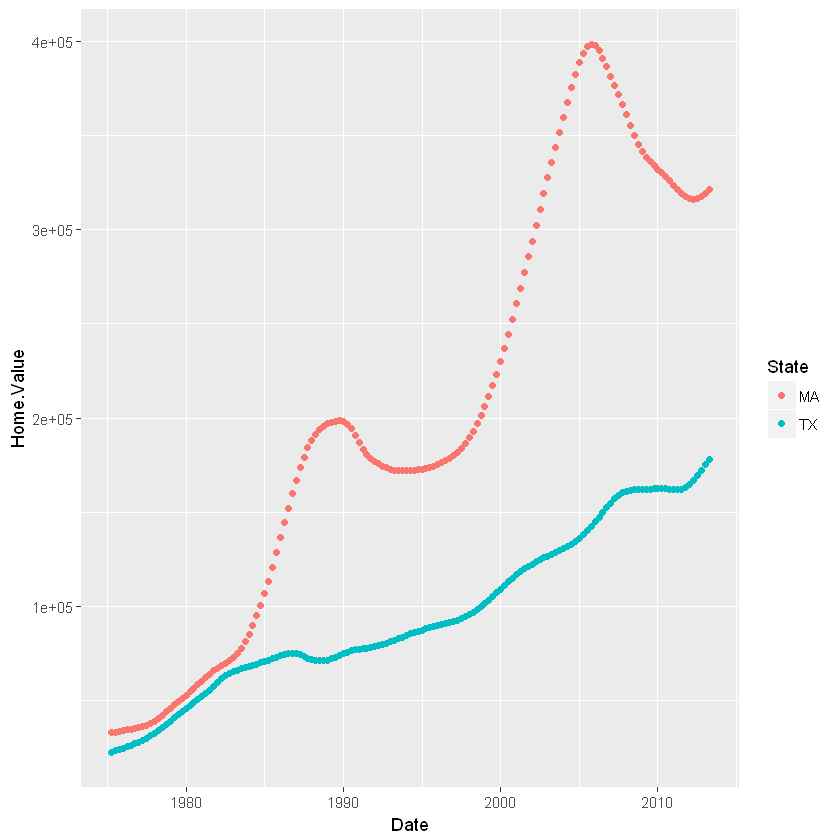

In [5]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

### Geometic Objects (geom)

Geometric objects are the actual marks we put on a plot. Examples include: 

help.search("geom_", package = "ggplot2")

In [6]:
# help.search("geom_", package = "ggplot2")

Points (Scatterplot)

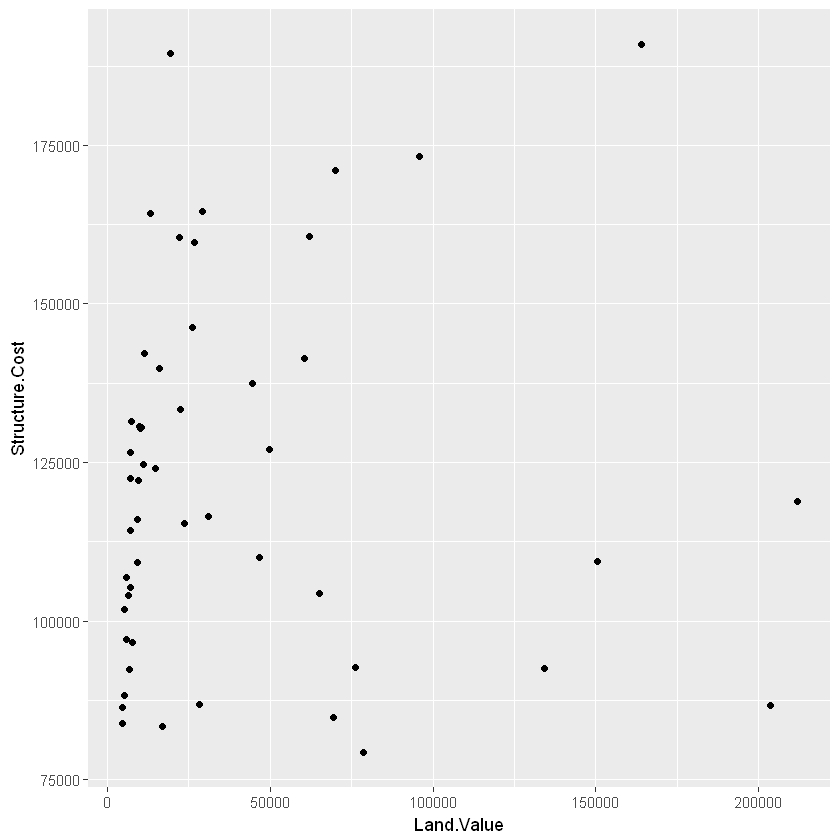

In [7]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

geom_point requires mappings for x and y, all others are optional. 

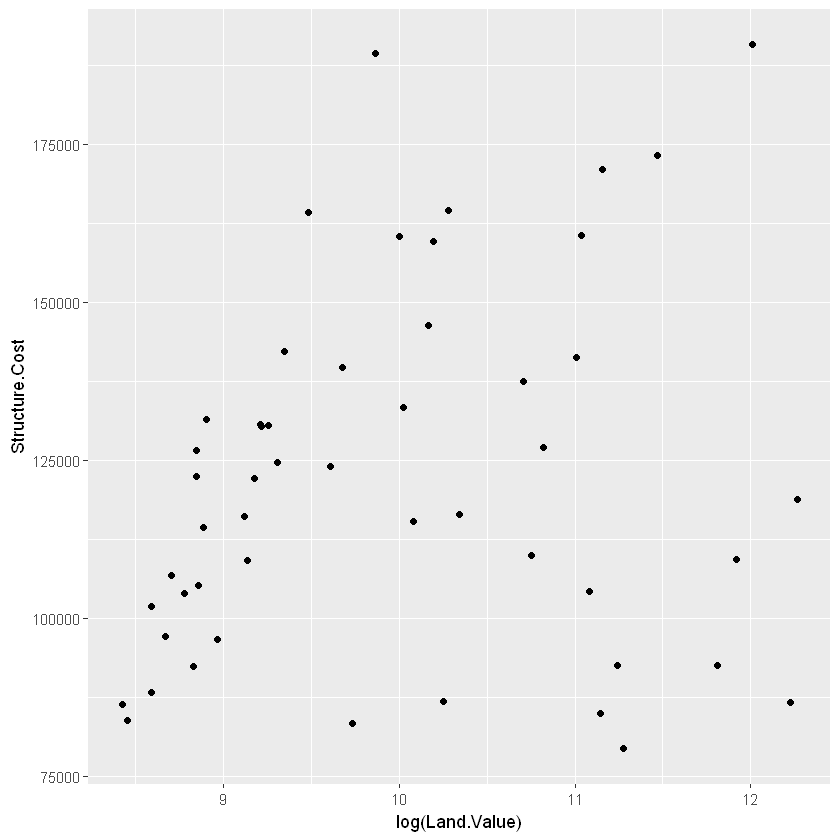

In [8]:
ggplot(hp2001Q1,aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

## Lines (Prediction Line)

A plot constructed with ggplot can have more than one geom. In that case the mappings established in the ggplot() call are plot defaults that can be added to or overridden. Our plot could use a regression line: 

In [9]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

In [10]:
p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))


Override on p1


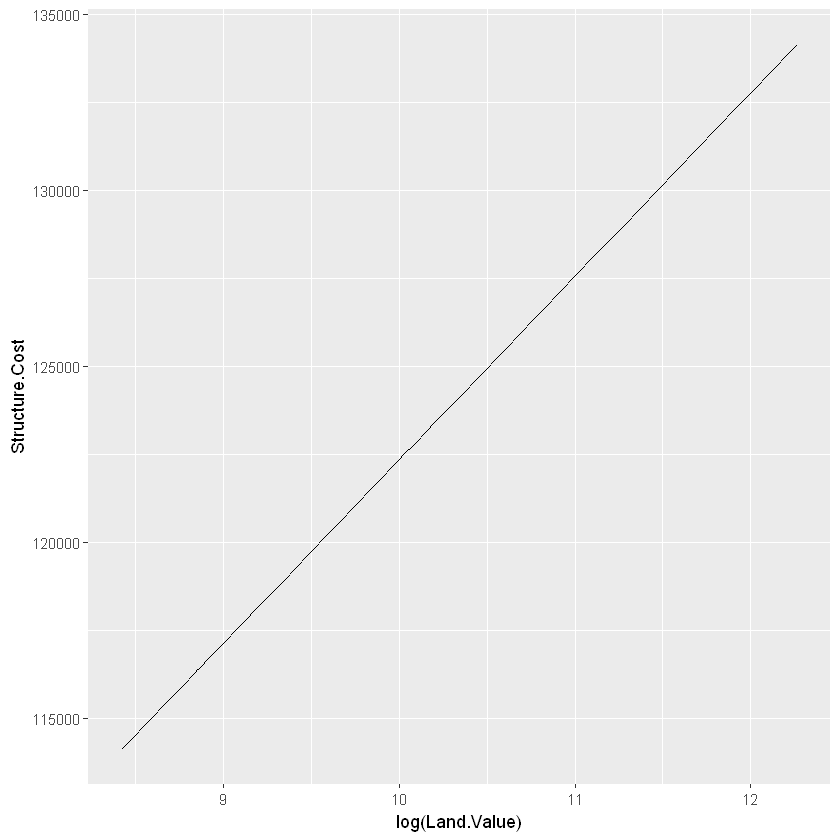

In [11]:
p1 +
  geom_line(aes(y = pred.SC))


## Smoothers

Not all geometric objects are simple shapes–the smooth geom includes a line and a ribbon. 

`geom_smooth()` using method = 'loess'


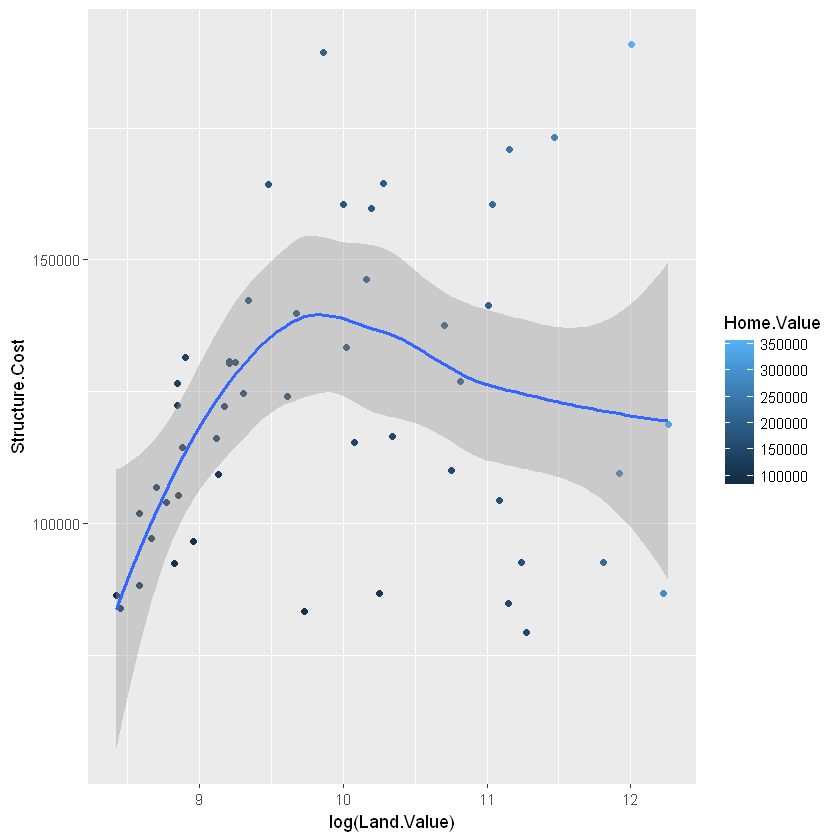

In [12]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()

## Text (Label Points)

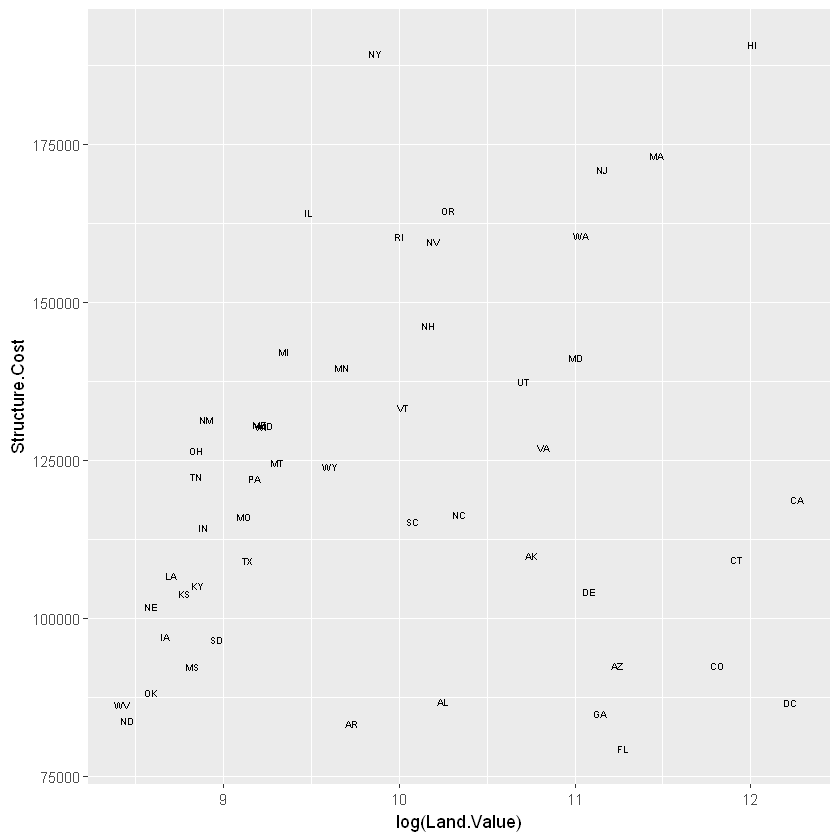

In [13]:
p1 + 
  geom_text(aes(label=State), size = 2)

package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vivek\AppData\Local\Temp\RtmpSOvPjz\downloaded_packages


Warning message:
"package 'ggrepel' was built under R version 3.3.3"

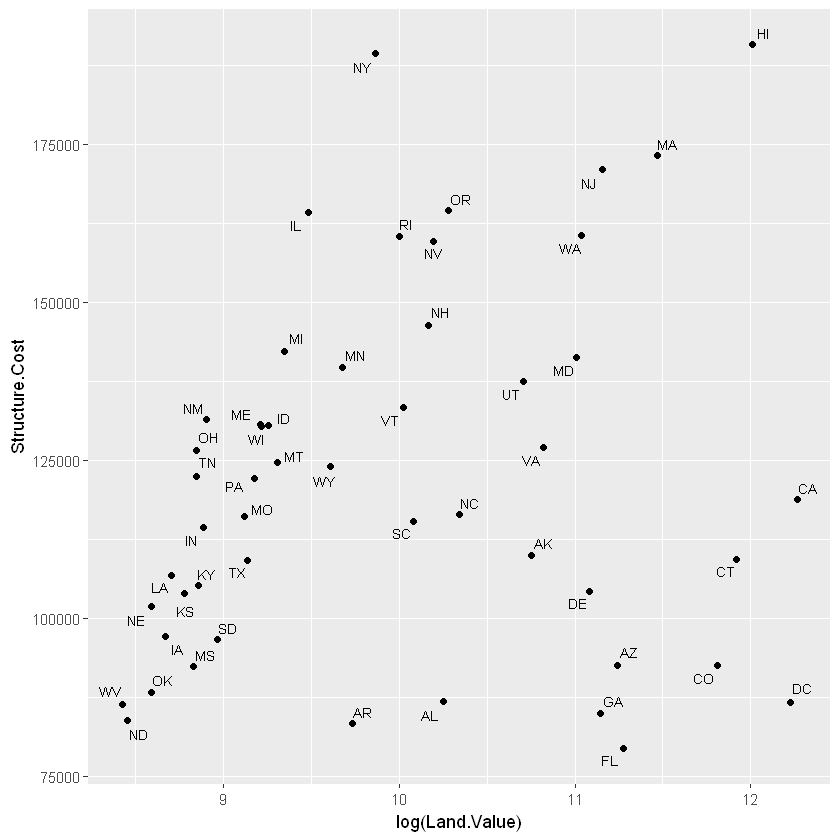

In [14]:
install.packages("ggrepel",repos="http://cran.r-project.org") 
library("ggrepel")
p1 + 
  geom_point() + 
  geom_text_repel(aes(label=State), size = 3)

## Aesthetic Mapping VS Assignment

Note that variables are mapped to aesthetics with the aes() function, while fixed aesthetics are set outside the aes() call. This sometimes leads to confusion, as in this example

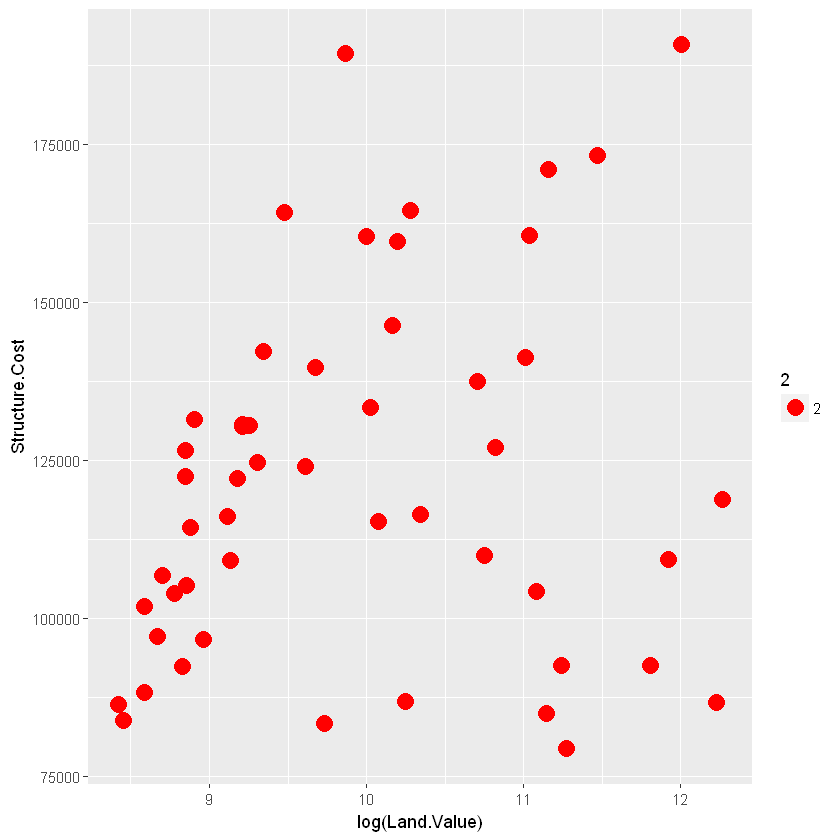

In [15]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable
             color="red") # this is fine -- all points red

# Mapping Variables To Other Aesthetics

Warning message:
"Removed 1 rows containing missing values (geom_point)."

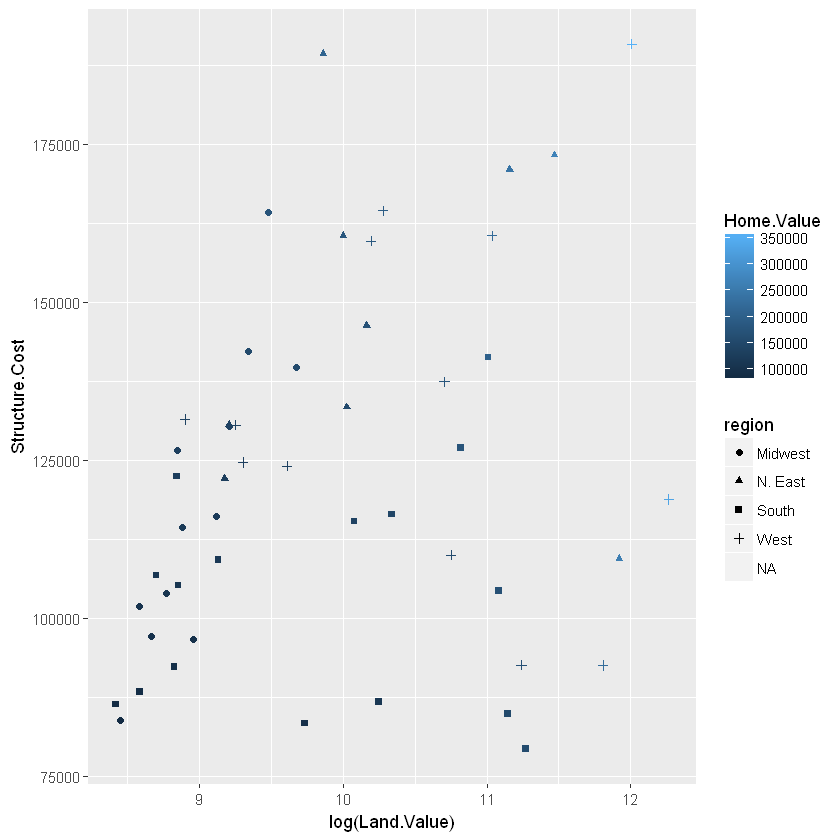

In [16]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

# Exercise I

The data for the exercises is available in the dataSets/EconomistData.csv file. Read it in with 

X,Country,HDI.Rank,HDI,CPI,Region
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia


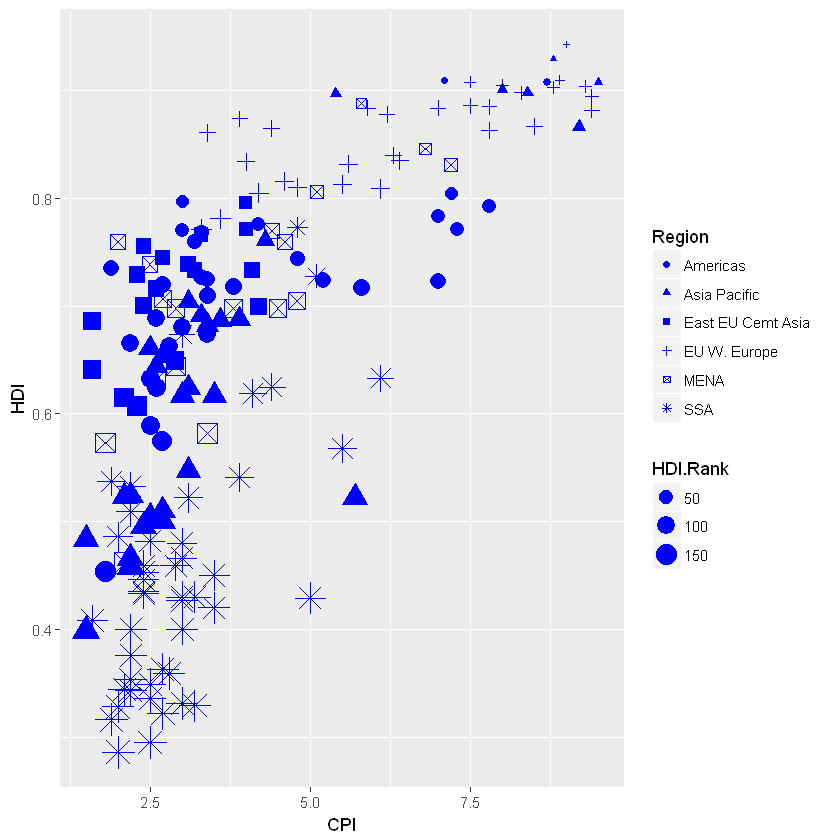

In [17]:
dat <- read.csv("C:/Users/vivek/Box Sync/Spring 2017/587 DIC/LAB3/data/Rgraphics/dataSets/EconomistData.csv")
head(dat)
#variables are inside the aes() and constant are outside
ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point(aes(shape=Region,size = HDI.Rank),color="blue")

These data consist of Human Development Index and Corruption Perception Index scores for several countries. <br>
Create a scatter plot with CPI on the x axis and HDI on the y axis.<br>
Color the points blue.<br>
Map the color of the the points to Region.<br>
Make the points bigger by setting size to 2<br>
Map the size of the points to HDI.Rank<br>

Statistical Transformations <br>

Statistical Transformations<br>
Some plot types (such as scatterplots) do not require transformations–each point is plotted at x and y coordinates<br> equal to the original value. Other plots, such as boxplots, histograms, prediction lines etc. require statistical transformations: <br>
for a boxplot the y values must be transformed to the median and 1.5(IQR)<br>
for a smoother smother the y values must be transformed into predicted values<br>
Each geom has a default statistic, but these can be changed. For example, the default statistic for geom_bar is<br> stat_bin: <br>

In [18]:
args(geom_histogram)
args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

# Setting Statistical Transformation Arguments

Arguments to stat_ functions can be passed through geom_ functions. This can be slightly annoying because in order to change it you have to first determine which stat the geom uses, then determine the arguments to that stat. 
For example, here is the default histogram of Home.Value: 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


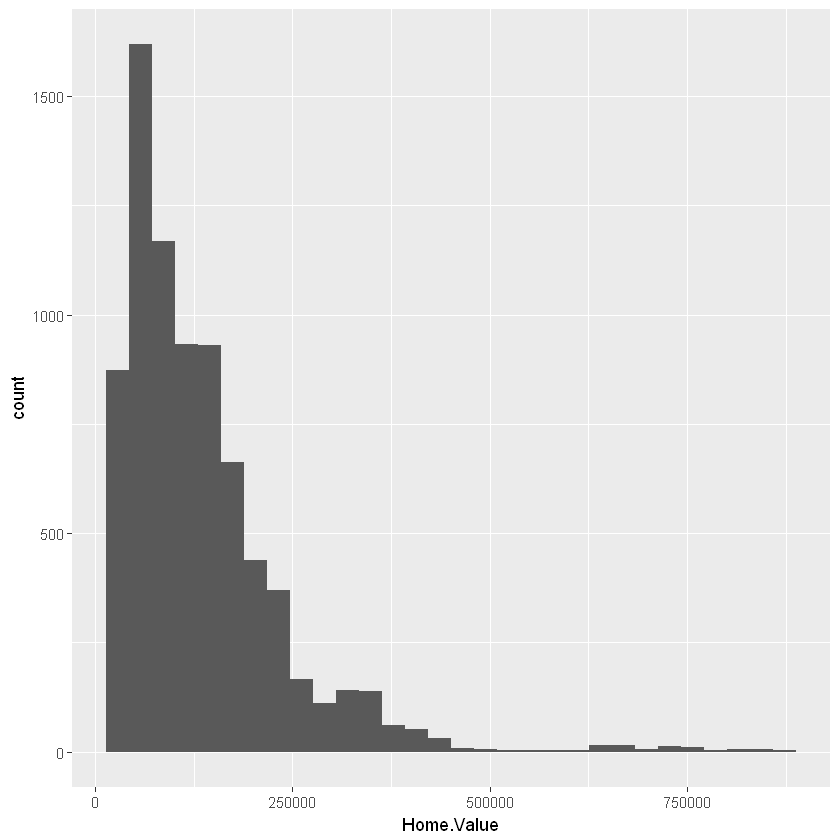

In [19]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

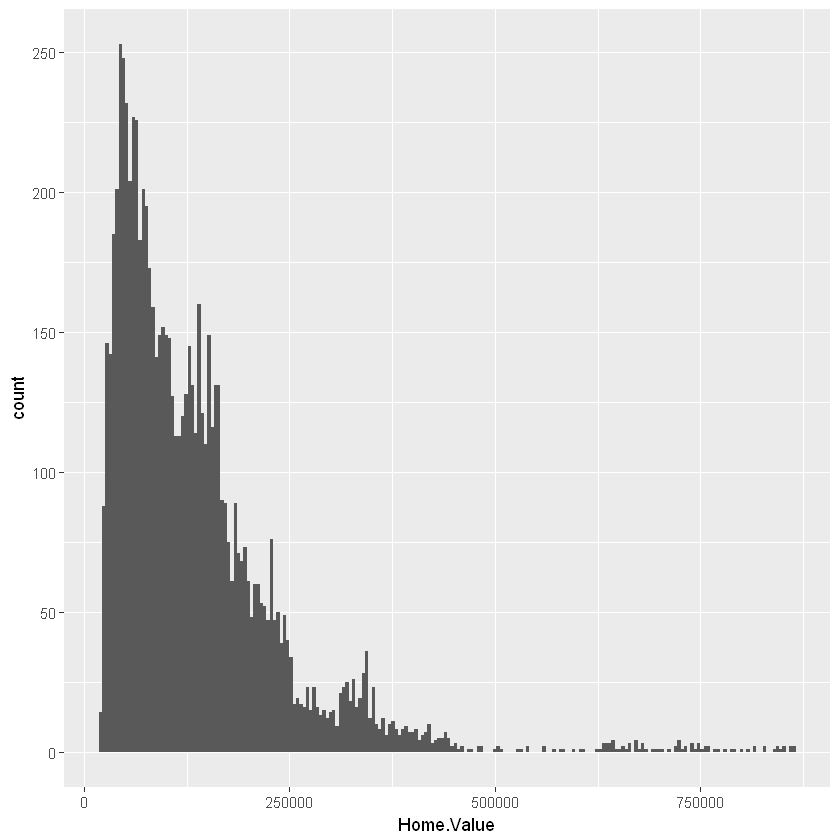

In [20]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

# Changing The Statistical Transformation

Sometimes the default statistical transformation is not what you need. This is often the case with pre-summarized data: 

In [21]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

,State,Home.Value
1,AK,147385.14
2,AL,92545.22
3,AR,82076.84
4,AZ,140755.59
5,CA,282808.08
6,CO,158175.99
46,VA,155391.44
47,VT,132394.60
48,WA,178522.58
49,WI,108359.45


ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
geom_bar()<br>
What is the problem with the previous plot? Basically we take binned and summarized 
data and ask ggplot to bin and summarize it again (remember, geom_bar defaults to stat = stat_count); obviously this will not work. 
We can fix it by telling geom_bar to use a different statistical transformation function: 

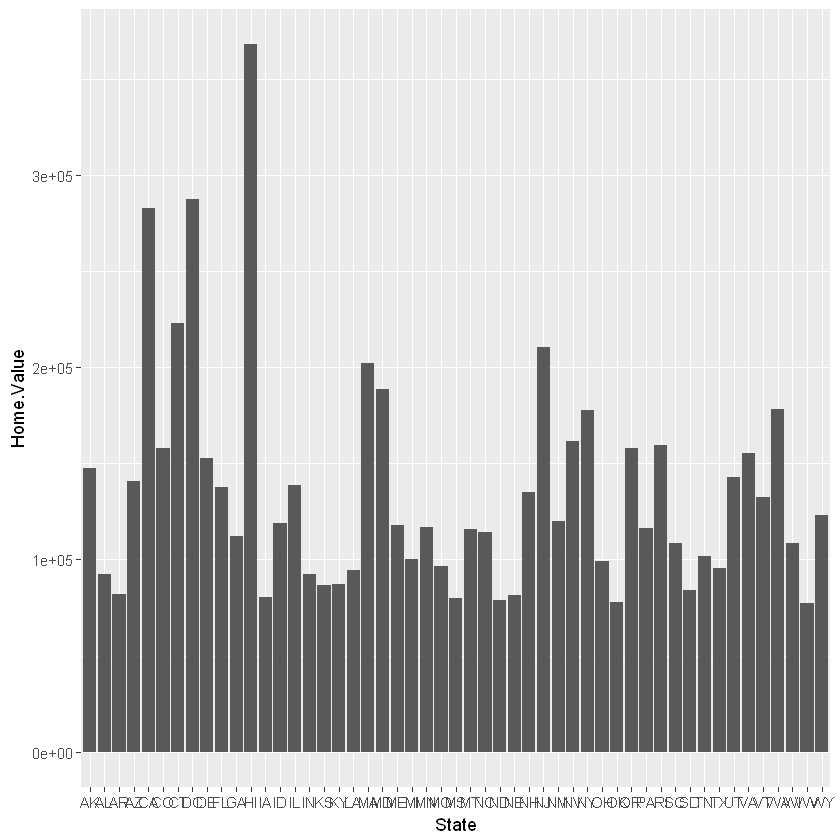

In [22]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")

## Exercise II

Re-create a scatter plot with CPI on the x axis and HDI on the y axis (as you did in the previous exercise).<br>
Overlay a smoothing line on top of the scatter plot using geom_smooth.<br>
Overlay a smoothing line on top of the scatter plot using geom_smooth, but use a linear model for the predictions.<br> Hint: see ?stat_smooth.<br>
Overlay a smoothing line on top of the scatter plot using geom_line. Hint: change the statistical transformation<br>
BONUS: Overlay a smoothing line on top of the scatter plot using the default loess method, but make it less smooth.<br> Hint: see ?loess.<br>

X,Country,HDI.Rank,HDI,CPI,Region
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia


`geom_smooth()` using method = 'loess'


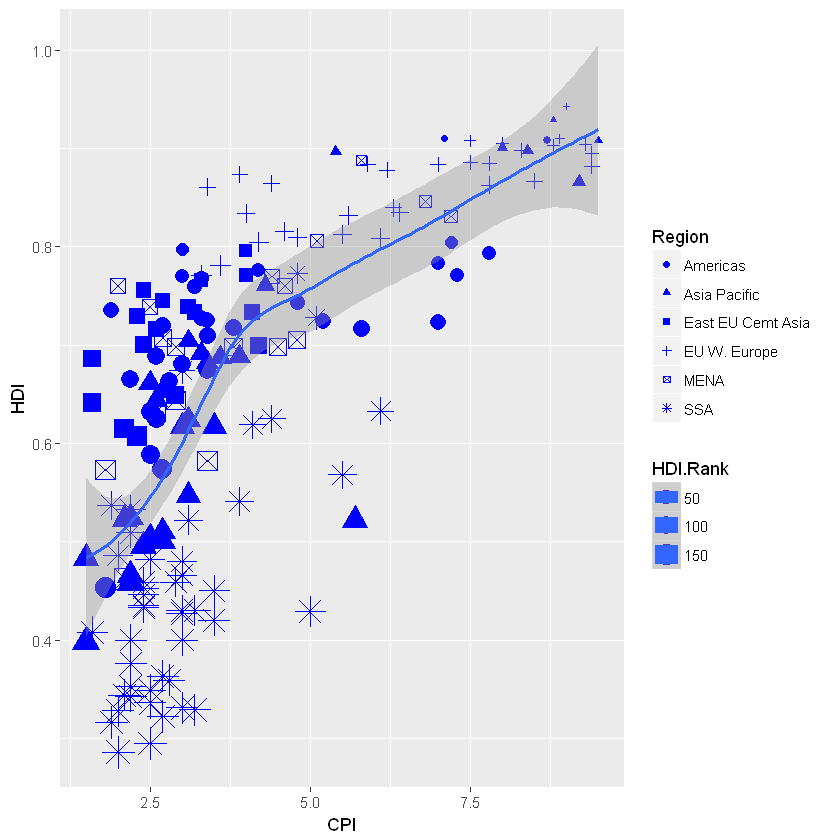

In [23]:
head(dat)
#variables are inside the aes() and constant are outside
ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point(aes(shape=Region,size = HDI.Rank),color="blue")+
geom_smooth()

Using LM

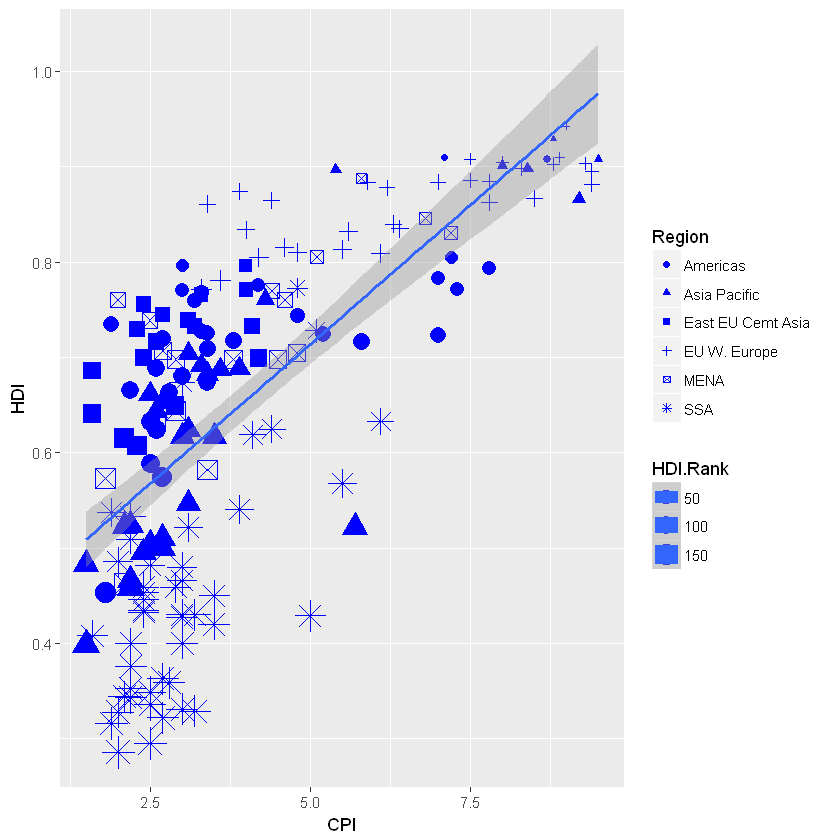

In [24]:
ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point(aes(shape=Region,size = HDI.Rank),color="blue")+
geom_smooth(method=lm)

In [25]:
# ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point(aes(shape=Region,size = HDI.Rank),color="blue")+
# geom_line(stat="smooth")

Scales

Scales: Controlling Aesthetic Mapping<br>

Aesthetic mapping (i.e., with aes()) only says that a variable should be mapped to an aesthetic. <br>
It doesn't say how that should happen. For example, when mapping a variable to shape with aes(shape = x) <br>you don't say what shapes should be used.<br> Similarly, aes(color = z) doesn't say what colors should be used. <br>Describing what colors/shapes/sizes etc. to use is done by modifying the corresponding scale.<br> In ggplot2 scales include 

position<br>
color and fill<br>
size<br>
shape<br>
line type<br>

Scales are modified with a series of functions using a scale_<aesthetic>_<type> naming scheme

# Scale Modification Examples

Start by constructing a dotplot showing the distribution of home values by Date and State. 

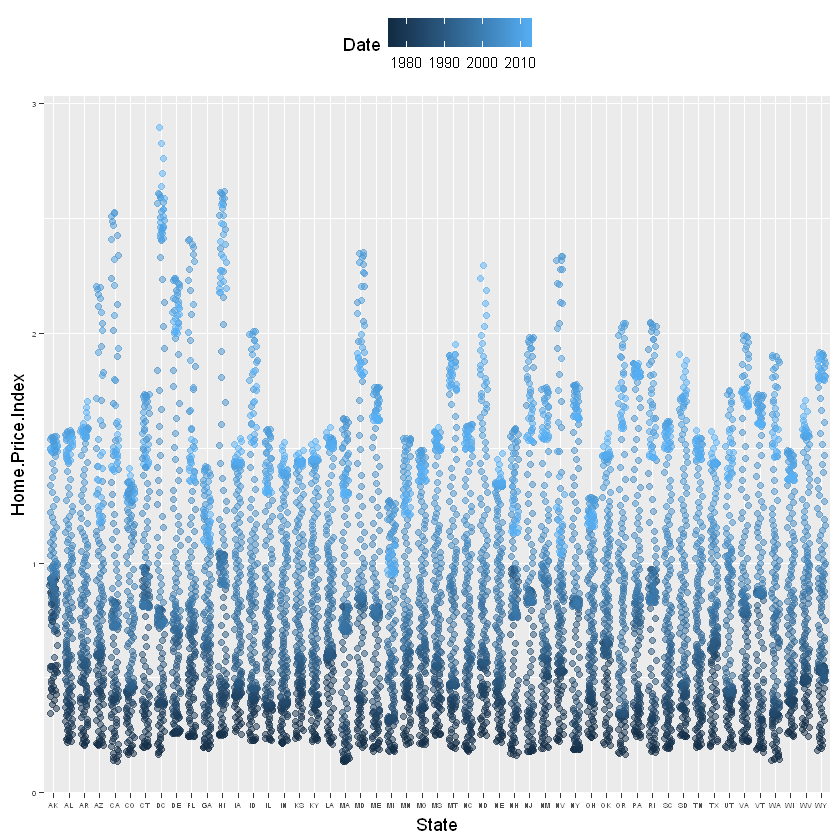

In [26]:
p3 <- ggplot(housing,aes(x = State,y= Home.Price.Index)) + theme(legend.position="top",axis.text=element_text(size = 4))
(p4 <- p3 + geom_point(aes(color = Date),alpha = 0.5,size = 1.5,position = position_jitter(width = 0.25, height = 0)))

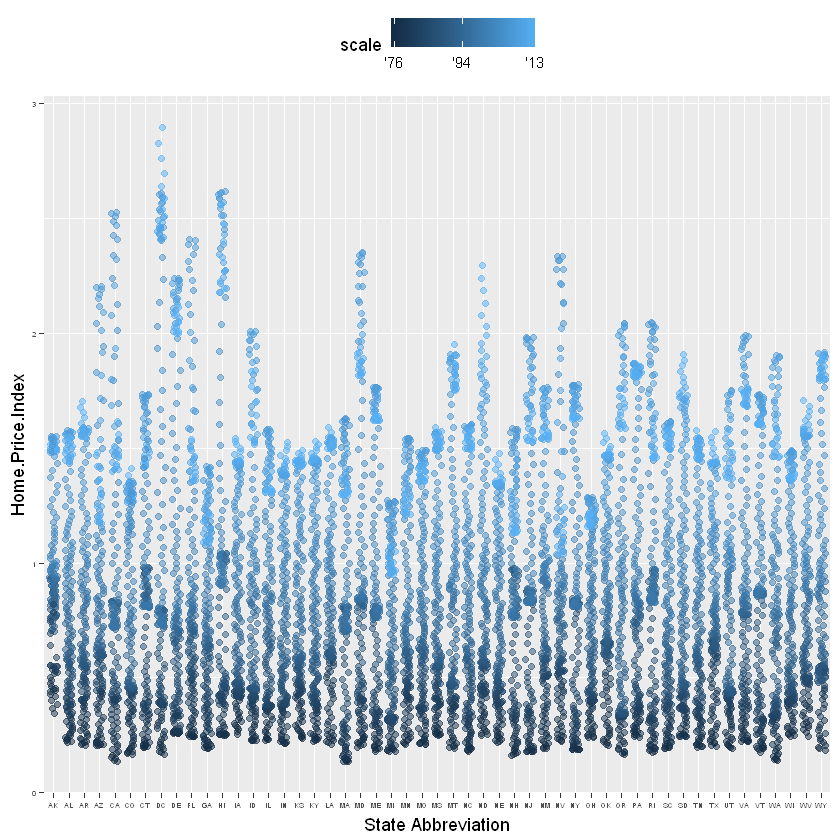

In [27]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="scale",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

Next change the low and high values to blue and red

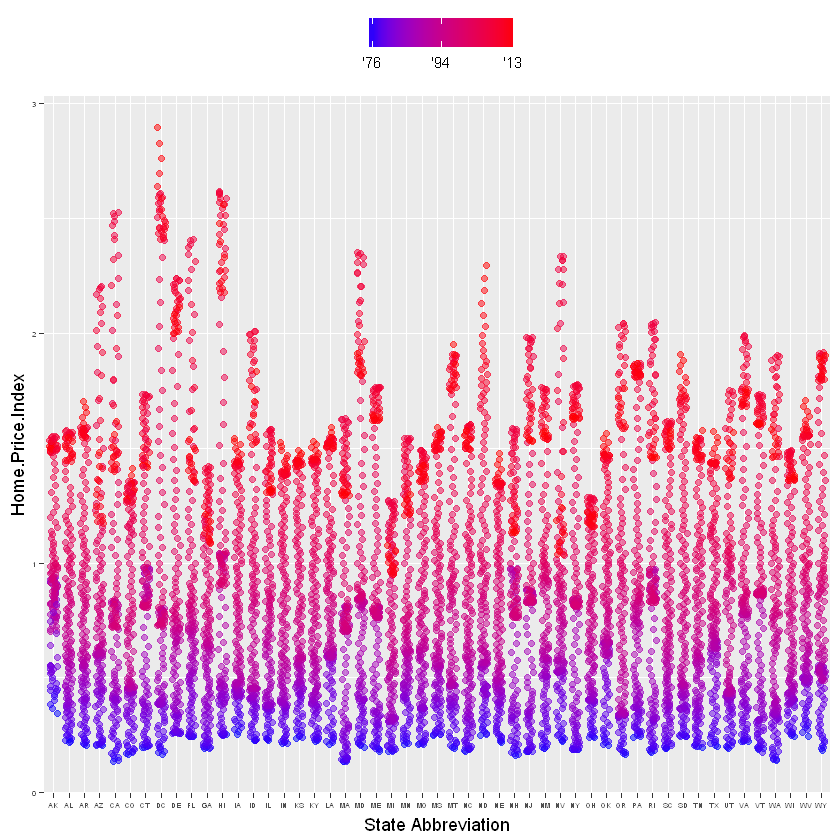

In [28]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

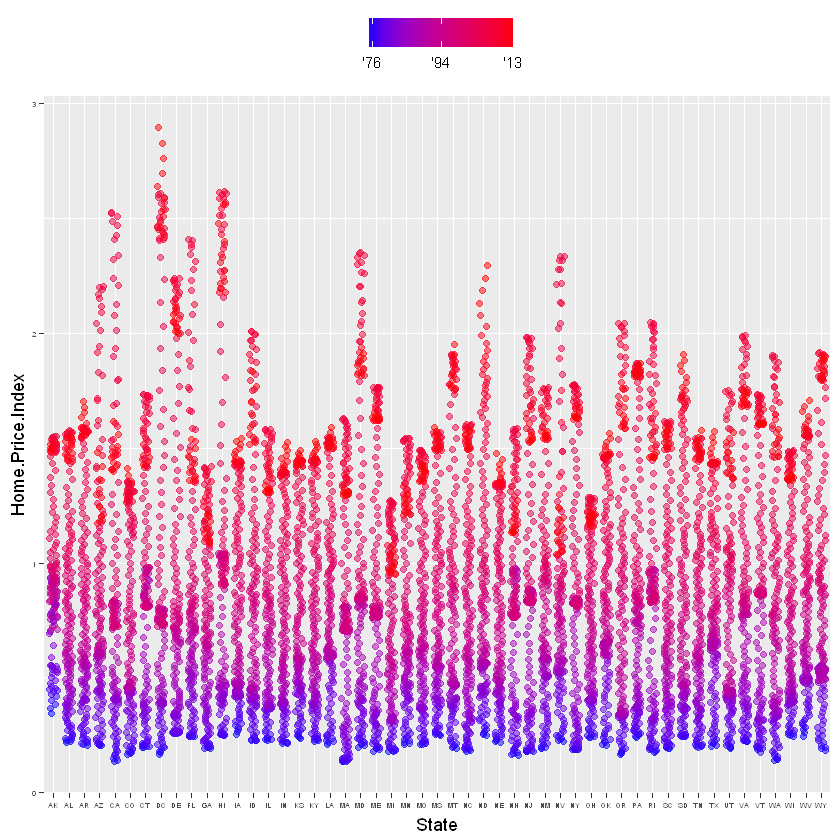

In [29]:
p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high ="red")

# Faceting

The idea is to create separate graphs for subsets of data

ggplot2 offers two functions for creating small multiples: <br>
facet_wrap(): define subsets as the levels of a single grouping variable<br>
facet_grid(): define subsets as the crossing of two grouping variables<br>

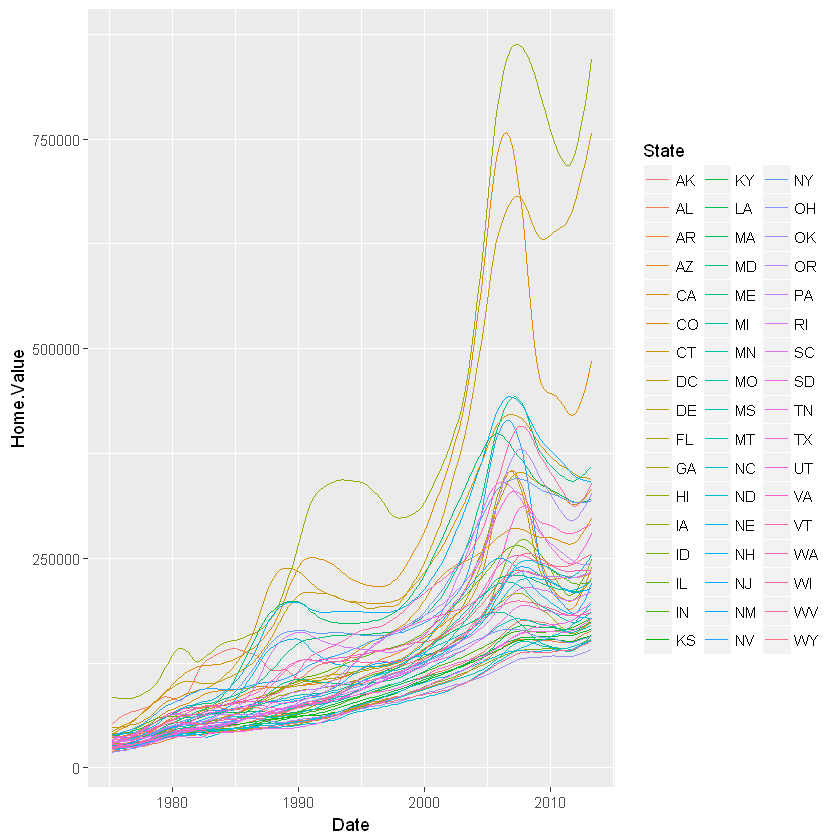

In [30]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

There are two problems here–there are too many states to distinguish each one by color, and the lines obscure one another. <br>
Faceting to the rescue<br>
We can remedy the deficiencies of the previous plot by faceting by state rather than mapping state to color. <br>

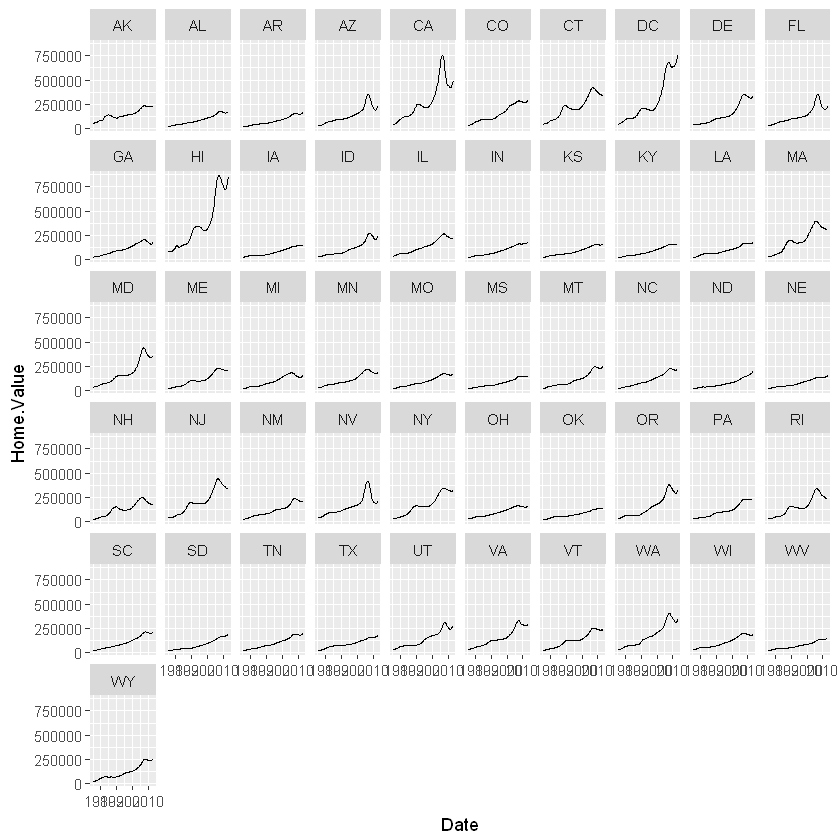

In [ ]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

There is also a facet_grid() function for faceting in two dimensions. 

# Themes

The ggplot2 theme system handles non-data plot elements such as

Axis labels<br>
Plot background<br>
Facet label backround<br>
Legend appearance<br>
Built-in themes include: <br>
theme_gray() (default)<br>
theme_bw()<br>
theme_classc()<br>

In [ ]:
p5 + theme_linedraw()

In [ ]:
p5 + theme_light()

# Overriding theme defaults

Specific theme elements can be overridden using theme(). For example: 

In [ ]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

# Creating and saving new themes

#### You can create new themes, as in the following example: 

In [ ]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = ("orange")))

p5 + theme_new

# Challenge: Recreate This Economist Graph

<img src="temp.png">

In [ ]:
head(dat)

In [ ]:
# install.packages("ggthemes",repos="http://cran.r-project.org") 
# install.packages("scales",repos="http://cran.r-project.org") 
library("ggthemes")
# library("scales")

In [ ]:
p1 <- ggplot(dat, aes(x = CPI, y = HDI),xlim(1:10)) + geom_point(aes(color=Region),shape=1,size=3)+theme_light()+scale_x_continuous(limits = c(1, 10),breaks=c(1,2,3,4,5,6,7,8,9,10))+
scale_y_continuous(limits = c(0.2,1),breaks=c(0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0))+geom_smooth(model="lm",se=FALSE)
p1
#geom_text(aes(label=Country),size=3)